<a href="https://colab.research.google.com/github/harishahamed26/Image-Recognition-Cat-Dog/blob/main/ImageClassificiationAnimals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognition

## Data loading and EDA


In [5]:
# Importing of necessary libraries

from numpy import matrix
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
import os
from skimage.feature import hog
from sklearn                import tree
from sklearn.decomposition import PCA


# defining the constant dimension 

Const_Dim = (200, 200)
RANDOM_SEED = 100

In [6]:
# Loading of data set

df_train_CSV = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/train.csv')


print('Printing 5 rows of the train dataset ')
print('\n')
print(df_train_CSV.head(5))


Printing 5 rows of the train dataset 


   id label
0   1   cat
1   2   dog
2   3   cat
3   4   cat
4   5   cat


In [7]:
# Importing of warnings package to ignore unncessary warnings
import warnings
warnings.filterwarnings('ignore')

# Definition of function for plotting
def plotGraph(data):
  sns.countplot(data)
  plt.title('Count plot')
  plt.show()


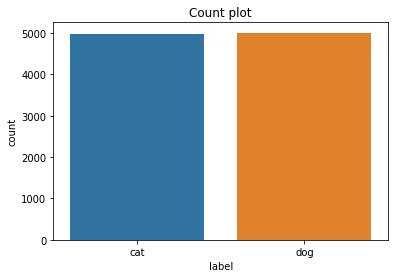

In [8]:
# Plotting of count plot for the train dataset
plotGraph(df_train_CSV['label'] )

In [9]:
#Definition of function to Load the image dataset 
from google.colab.patches import cv2_imshow
import os
def LoadImage(ids, dataset_name , dim):

  images = []
  for id in ids:
    print(f'id is. {id}')
    img_name =  f'{id}.jpg'
    url = f"curl -o {img_name} https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/{dataset_name}/{img_name}"
    os.system(url)
    img = cv2.imread(img_name)
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images


In [10]:
# Loading of train images

train_images = LoadImage(df_train_CSV['id'], 'train_images', Const_Dim)
print(f'Number of training images loaded: {len(train_images)}')


Streaming output truncated to the last 5000 lines.
id is. 5002
id is. 5003
id is. 5004
id is. 5005
id is. 5006
id is. 5007
id is. 5008
id is. 5009
id is. 5010
id is. 5011
id is. 5012
id is. 5013
id is. 5014
id is. 5015
id is. 5016
id is. 5017
id is. 5018
id is. 5019
id is. 5020
id is. 5021
id is. 5022
id is. 5023
id is. 5024
id is. 5025
id is. 5026
id is. 5027
id is. 5028
id is. 5029
id is. 5030
id is. 5031
id is. 5032
id is. 5033
id is. 5034
id is. 5035
id is. 5036
id is. 5037
id is. 5038
id is. 5039
id is. 5040
id is. 5041
id is. 5042
id is. 5043
id is. 5044
id is. 5045
id is. 5046
id is. 5047
id is. 5048
id is. 5049
id is. 5050
id is. 5051
id is. 5052
id is. 5053
id is. 5054
id is. 5055
id is. 5056
id is. 5057
id is. 5058
id is. 5059
id is. 5060
id is. 5061
id is. 5062
id is. 5063
id is. 5064
id is. 5065
id is. 5066
id is. 5067
id is. 5068
id is. 5069
id is. 5070
id is. 5071
id is. 5072
id is. 5073
id is. 5074
id is. 5075
id is. 5076
id is. 5077
id is. 5078
id is. 5079
id is. 5080
i

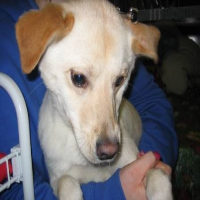

In [11]:
# Displaying a sample of train image 

cv2_imshow(train_images[1])

## Pre-processing & Image Manipulation 



In [12]:
'''
Defining the function to plot confusion matrix, Accuracy and 
Classification Report
'''

# Function to show the Classification Report 
def ClassificationAndAccuracyReport(ACC, CR):
  print("Classification Report")
  print("\n")
  print(CR)
  print("\n")
  print("Model Accuracy")
  print("\n")
  print(ACC)


# Functio to plot the Confusion matrix

def plot_confusion_matrix(value):
  print("\n")
  
  plt.figure(figsize= (8,8))
  sns.heatmap(value , annot = True, cmap= 'rocket_r')
  plt.title('Confusion Matrix')
  plt.show()



# Function to Check the accuracy score and print classification report
def ReportAndScore(actuals, predictions):
  Accuracy        = accuracy_score(actuals, predictions)
  ConfusionMatrix = confusion_matrix(actuals, predictions)
  return Accuracy, ConfusionMatrix


In [13]:
# Definition of SVM algorithm
def SVM_Algoritham(X_train, X_test, Y_train, Y_test):
  SVM_model = svm.SVC()
  SVM_model.fit(X_train, Y_train)

  # making predictions on the testing set 
  Y_predict = SVM_model.predict(X_test)

  ACC, CM =ReportAndScore(Y_test, Y_predict)
  plot_confusion_matrix(CM)

  CR      = classification_report(Y_test, Y_predict)
  ClassificationAndAccuracyReport(ACC, CR)
  return SVM_model
  


In [14]:
# Method to implement PCA
def Method_PCA(value):
  pca = PCA(n_components= min(value.shape))
  pca.fit(value)
  value = pca.transform(value)

  print(f'Shape of transformed data: {value.shape}')
  return value


## Feature Extraction


1. Image Vectorisation
2. Canny Edge detection
3. HOG - Histogram of Oriented Gradient
4. PCA - Principle Component Analysis

### Model 1

Applying Image Vectorisation in SVM Algorithm

In [130]:

# Method to Get the feature - Image Vectorisation

def M1_Features(f_value):
  
  Features_List = []
  for G_img in f_value:
    Gray = cv2.cvtColor(G_img, cv2.COLOR_BGR2GRAY)
    features = G_img.flatten()
    Features_List.append(features)
  Features_List = np.array(Features_List)
  return Features_List

In [131]:

Features_Train_M1 = M1_Features(train_images)
print(f'Shape of the Feature is {Features_Train_M1.shape}')

Shape of the Feature is (4000, 120000)


In [ ]:
Features_Train_M1 = Method_PCA(Features_Train_M1)

In [28]:
# Data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M1, df_train_CSV['label'][0:500], test_size=0.3, random_state=RANDOM_SEED)


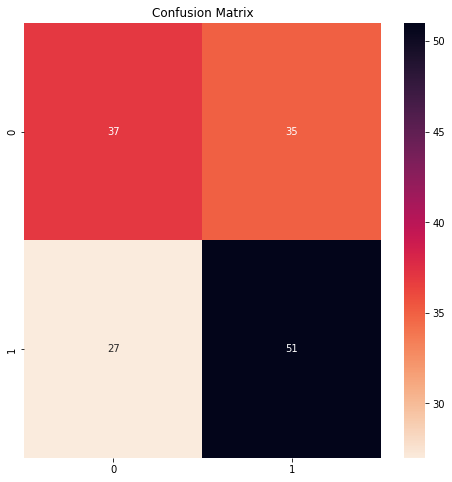

Classification Report


              precision    recall  f1-score   support

         cat       0.58      0.51      0.54        72
         dog       0.59      0.65      0.62        78

    accuracy                           0.59       150
   macro avg       0.59      0.58      0.58       150
weighted avg       0.59      0.59      0.58       150



Model Accuracy


0.5866666666666667


In [29]:
# Implementation of SVM Algorithm
m1_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

### Model 2


Applying Image Vectorisation & Canny Edge Detection in SVM Algorithm


In [13]:
# Canny Edge Detection
m_right = np.float32([[1,0,50],[0,1,50]])
m_left = np.float32([[1,0,-50],[0,1,0]])

def M2_Features(images):
  features_list = []

  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Flipping, Resizing and Hog implementation
    img_vflipped = cv2.flip(img_grayscaled, 0)
    img_hflipped = cv2.flip(img_grayscaled, 1)

    
    img_v_resized = cv2.resize(img_vflipped, (50, 100))

    hog_v_features, hog_v_image = hog(img_v_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )


    img_h_resized = cv2.resize(img_hflipped, (50, 100))

    hog_h_features, hog_h_image = hog(img_h_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )


    # Translation, Resizing and Hog implementation
    img_translated_r = cv2.warpAffine(img_grayscaled, m_right, Const_Dim)
    img_translated_l = cv2.warpAffine(img_grayscaled, m_left, Const_Dim)

    img_r_resized = cv2.resize(img_translated_r, (50, 100))
    img_l_resized = cv2.resize(img_translated_l, (50, 100))


    hog_r_features, hog_r_image = hog(img_r_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    
    hog_l_features, hog_l_image = hog(img_l_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    
    
    features = np.hstack((hog_v_features ,hog_h_features, hog_r_features, hog_l_features))
    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

In [14]:
Features_Train_M2 = M2_Features(train_images)
print(Features_Train_M2.shape)

(10000, 7920)


In [15]:
# Data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M2, df_train_CSV['label'], 
                                                    test_size=0.3, random_state=RANDOM_SEED)


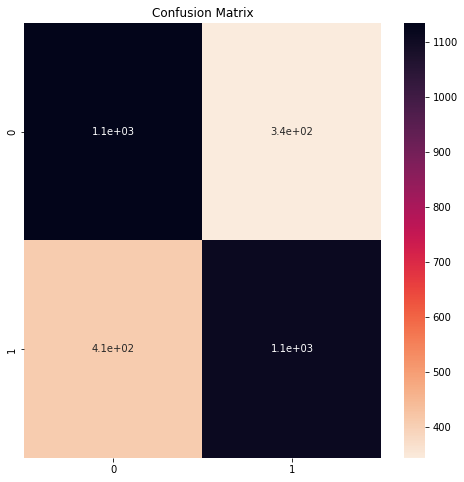

Classification Report


              precision    recall  f1-score   support

         cat       0.73      0.77      0.75      1478
         dog       0.76      0.73      0.75      1522

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



Model Accuracy


0.7483333333333333


In [16]:
# Implementation of SVM Algorithm
m2_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

### Model 3

Applying Image Vectorisation, Canny Edge Detection and HOG in SVM & DT Algorithm

In [17]:


# method to get image features
def M3_Features(images):
  features_list = []
  
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    img_resized = cv2.resize(img_grayscaled, (50, 100))

    hog_features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    #features = np.hstack((edge_features, hog_features))
    features_list.append(hog_features)
    

  features_list = np.array(features_list)
  return features_list
     

In [18]:
# feature extraction
Features_Train_M3= M3_Features(train_images)
print(Features_Train_M3.shape)

(10000, 1980)


In [19]:
# data split for train and validation
X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M3, df_train_CSV['label'], 
                                                    test_size=0.3, random_state=RANDOM_SEED)

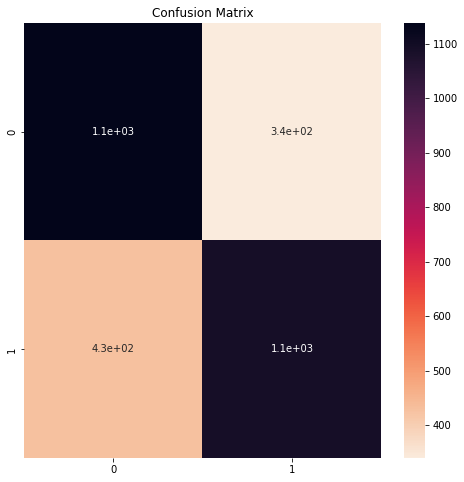

Classification Report


              precision    recall  f1-score   support

         cat       0.73      0.77      0.75      1478
         dog       0.76      0.72      0.74      1522

    accuracy                           0.74      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.74      0.74      3000



Model Accuracy


0.7433333333333333


In [20]:
# Implementation of SVM Algorithm
m3_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

#### Grid Search CV

In [21]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(m3_SVM, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [ ]:

grid_predictions = grid.predict(X_test)

  
# print classification report
print(classification_report(Y_test, grid_predictions))
print(accuracy_score(Y_test, grid_predictions))
print(grid.best_score_)

#### Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
rand_search = RandomizedSearchCV(m3_SVM, param_distributions = rand_list, n_iter = 20, 
                                 n_jobs = 4, cv = 3, random_state = 2017) 
rand_search.fit(X_train, Y_train) 


In [ ]:
rand_search.best_score_

In [ ]:

Rand_predictions = rand_search.predict(X_test)

  
# print classification report
print(classification_report(Y_test, Rand_predictions))
print(accuracy_score(Y_test, Rand_predictions))

### Model 4

In [19]:
from skimage.feature import  local_binary_pattern

def M4_Features(images):
  features_list = []
  for img in images:
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized    = cv2.resize(img_grayscaled, (50, 100))

    lbp_img        = local_binary_pattern(img_resized, 8,1,
                                          method= 'uniform').ravel()

    hog_features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), visualize=True )
    features = np.hstack((lbp_img, hog_features))
    features_list.append(features)
    
  features_list = np.array(features_list)
  return features_list

In [20]:
# feature extraction

Features_Train_M4= M4_Features(train_images)
print(Features_Train_M4.shape)

(10000, 25736)


In [ ]:
Features_Train_M4 = Method_PCA(Features_Train_M4)

In [21]:
# data split for train and validation

X_train, X_test, Y_train, Y_test = train_test_split(Features_Train_M4, df_train_CSV['label'], 
                                                    test_size=0.3, random_state=RANDOM_SEED)

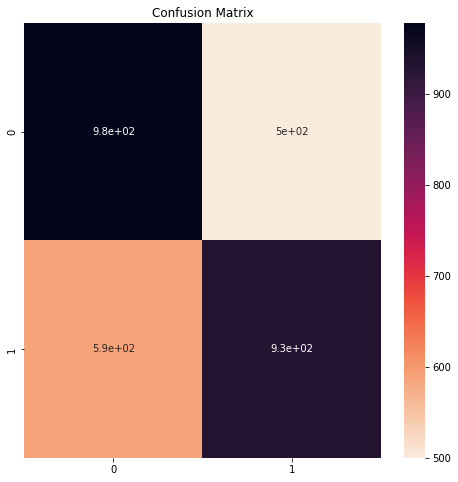

Classification Report


              precision    recall  f1-score   support

         cat       0.62      0.66      0.64      1478
         dog       0.65      0.61      0.63      1522

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



Model Accuracy


0.637


In [43]:
# Implementation of SVM Algorithm
m4_SVM = SVM_Algoritham(X_train, X_test, Y_train, Y_test)

# Prediciton of Test dataset

In [11]:
# Prediciton

df_test_CSV  = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Image-Recognition-Cat-Dog/main/test.csv')

print('\n')
print('Printing 5 rows of the test dataset ')
print('\n')
print(df_test_CSV.head(5))



Printing 5 rows of the test dataset 


   id
0   1
1   2
2   3
3   4
4   5


In [12]:
# Loading of test images

test_images = LoadImage(df_test_CSV['id'], 'test_images' , Const_Dim)
print(f'Number of training images loaded: {len(test_images)}')


id is. 1
id is. 2
id is. 3
id is. 4
id is. 5
id is. 6
id is. 7
id is. 8
id is. 9
id is. 10
id is. 11
id is. 12
id is. 13
id is. 14
id is. 15
id is. 16
id is. 17
id is. 18
id is. 19
id is. 20
id is. 21
id is. 22
id is. 23
id is. 24
id is. 25
id is. 26
id is. 27
id is. 28
id is. 29
id is. 30
id is. 31
id is. 32
id is. 33
id is. 34
id is. 35
id is. 36
id is. 37
id is. 38
id is. 39
id is. 40
id is. 41
id is. 42
id is. 43
id is. 44
id is. 45
id is. 46
id is. 47
id is. 48
id is. 49
id is. 50
id is. 51
id is. 52
id is. 53
id is. 54
id is. 55
id is. 56
id is. 57
id is. 58
id is. 59
id is. 60
id is. 61
id is. 62
id is. 63
id is. 64
id is. 65
id is. 66
id is. 67
id is. 68
id is. 69
id is. 70
id is. 71
id is. 72
id is. 73
id is. 74
id is. 75
id is. 76
id is. 77
id is. 78
id is. 79
id is. 80
id is. 81
id is. 82
id is. 83
id is. 84
id is. 85
id is. 86
id is. 87
id is. 88
id is. 89
id is. 90
id is. 91
id is. 92
id is. 93
id is. 94
id is. 95
id is. 96
id is. 97
id is. 98
id is. 99
id is. 100
id is. 1

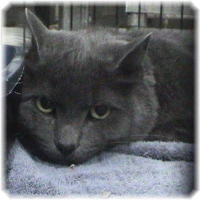

In [67]:
# Displaying a sample of test image 

cv2_imshow(test_images[1])

In [68]:
predict_Test = M2_Features(test_images)
print(predict_Test.shape)

(1000, 7920)


In [69]:
predict_svm = m2_SVM.predict(predict_Test)
predict_svm[0:10]

array(['dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat',
       'dog'], dtype=object)

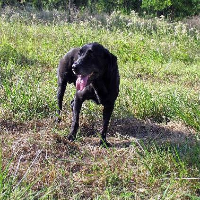

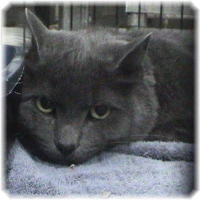

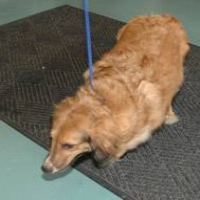

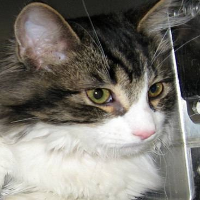

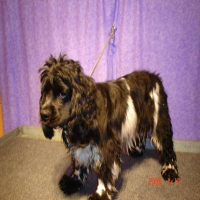

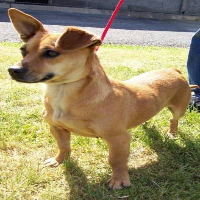

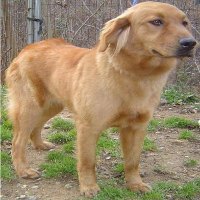

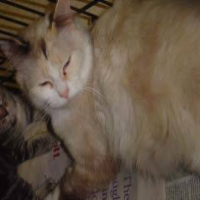

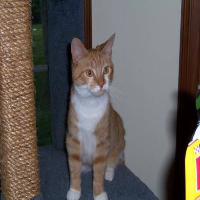

In [70]:
for i in range(0,9):
  cv2_imshow(test_images[i])


In [ ]:

import json

import pandas as pd

test_file_path = "data/test-predictions.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))